#**Pengurutan 10 Mahasiswa Berprestasi Berdasarkan IPK**
Proyek ini bertujuan untuk menganalisis kinerja dua algoritma pengurutan, yaitu Selection Sort Iteratif dan Insertion Sort Rekursif, dalam konteks dunia nyata menggunakan dataset asli. Fokus utama proyek ini adalah pengurutan data GPA (Grade Point Average) untuk tujuan menentukan mahasiswa berprestasi. Dataset yang digunakan mencakup ID Mahasiswa dan GPA dari beberapa mahasiswa. Tujuan utama adalah mengurutkan data berdasarkan kolom GPA secara menurun (descending), sehingga mahasiswa dengan IPK tertinggi akan muncul di urutan pertama. Dari hasil pengurutan ini, akan diidentifikasi 10 mahasiswa dengan GPA terbaik.

**Import library yang dibutuhkan**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import time


**Membaca dataframe**

In [2]:
df = pd.read_csv('/content/StudentPerformance.csv')

**Membuat fungsi Selection Sort secara Iteratif dan fungsi Insertion Sort secara Rekursif**

*   Selection Sort Iteratif: DataFrame asli disalin untuk menjaga data tetap utuh selama proses sorting. Algoritma melakukan iterasi dengan indeks 𝑖, mencari elemen maksimum pada kolom ‘GPA’ dari posisi 𝑖 hingga akhir dataset. Jika elemen maksimum tidak berada pada posisi 𝑖, algoritma menukar barisnya. Proses ini diulang hingga seluruh data terurut.
*  Insertion Sort Rekursif: Base case terjadi ketika jumlah elemen yang akan diurutkan kurang dari atau sama dengan 1, sehingga DataFrame dianggap sudah terurut. Algoritma memanggil dirinya sendiri untuk mengurutkan elemen pertama hingga ke-n-1. Setelah itu, elemen terakhir ditempatkan pada posisi yang tepat dengan membandingkannya secara berulang dan memindahkan elemen yang lebih kecil. Proses ini selesai ketika elemen terakhir berada di posisi yang benar.

In [8]:
def selection_sort_iterative(df, column_name):
    data = df.copy()
    n = len(data)
    for i in range(n):
        max_index = i
        for j in range(i + 1, n):
            if data[column_name].iloc[j] > data[column_name].iloc[max_index]:
                max_index = j
        # Swap entire rows
        if max_index != i:
            data.iloc[[i, max_index]] = data.iloc[[max_index, i]].values
    return data


def insertion_sort_recursive(df, column_name, n=None):
    if n is None:
        n = len(df)
        df = df.copy()
    # Base case
    if n <= 1:
        return df
    # Sort the first n-1 elements
    df = insertion_sort_recursive(df, column_name, n - 1)
    # Insert the nth element in the correct position
    last_row = df.iloc[n - 1].copy()
    j = n - 2
    while j >= 0 and df[column_name].iloc[j] < last_row[column_name]:
        df.iloc[j + 1] = df.iloc[j]
        j -= 1
    df.iloc[j + 1] = last_row
    return df



**Menampilkan Data sebelum dilakukan Sorting**

In [9]:
print("Data Asli:")
print(df.head(10))

Data Asli:
   StudentID       GPA
0       1001  2.929196
1       1002  3.042915
2       1003  0.112602
3       1004  2.054218
4       1005  1.288061
5       1006  3.084184
6       1007  2.748237
7       1008  1.360143
8       1009  2.896819
9       1010  3.573474


**Menampilkan Data setelah Diurutkan dengan Selection Sort**

In [10]:
sorted_df_selection = selection_sort_iterative(df, 'GPA')
print("\nData Setelah Selection Sort Iteratif:")
print(sorted_df_selection.head(10))


Data Setelah Selection Sort Iteratif:
   StudentID       GPA
0       1045  4.000000
1       1443  4.000000
2       2279  4.000000
3       2706  4.000000
4       2920  4.000000
5       3029  4.000000
6       3320  4.000000
7       2261  3.984674
8       3355  3.979421
9       2901  3.951460


**Menampilkan Data setelah Diurutkan dengan Insertion Sort**

In [12]:
import sys
sys.setrecursionlimit(3000)
sorted_df_insertion = insertion_sort_recursive(df, 'GPA')
print("\nData Setelah Insertion Sort Rekursif:")
print(sorted_df_insertion.head(10))


Data Setelah Insertion Sort Rekursif:
   StudentID       GPA
0       1045  4.000000
1       1443  4.000000
2       2279  4.000000
3       2706  4.000000
4       2920  4.000000
5       3029  4.000000
6       3320  4.000000
7       2261  3.984674
8       3355  3.979421
9       2901  3.951460


**Membuat grafik untuk membandingkan waktu eksekusi Selection Sort Iteratif dan Insertion Sort Rekursif untuk berbagai ukuran dataset.**

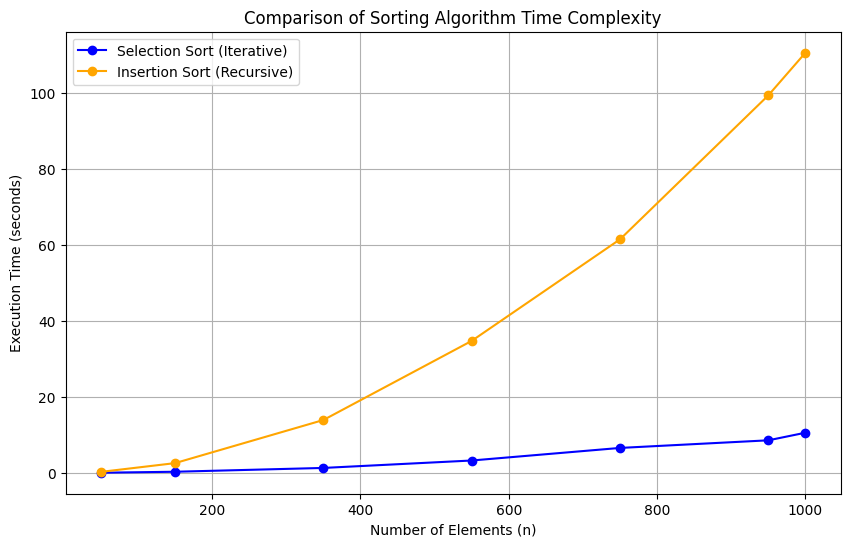

In [13]:
sizes = [50, 150, 350, 550, 750, 950, 1000]
selection_times = []
insertion_times = []


for size in sizes:
    test_data = df[:size]

    # Selection Sort
    start_time = time.time()
    selection_sort_iterative(test_data, 'GPA')
    selection_times.append(time.time() - start_time)

    # Insertion Sort
    start_time = time.time()
    try:
        insertion_sort_recursive(test_data, 'GPA')
        insertion_times.append(time.time() - start_time)
    except RecursionError:
        insertion_times.append(float('inf'))  # Jika terlalu besar untuk rekursi

# Plot hasil
plt.figure(figsize=(10, 6))
plt.plot(sizes, selection_times, marker='o', label='Selection Sort (Iterative)', color='blue')
plt.plot(sizes, insertion_times, marker='o', label='Insertion Sort (Recursive)', color='orange')
plt.title('Comparison of Sorting Algorithm Time Complexity')
plt.xlabel('Number of Elements (n)')
plt.ylabel('Execution Time (seconds)')
plt.legend()
plt.grid()
plt.show()